In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# Load the data
file_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/tmp/Crypto-Clustering-Analysis/static/Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Data loaded successfully.


In [8]:
# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())


First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   

In [9]:
# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())



Checking for null values:
coin_id                         0
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64


In [10]:
# Drop any rows with null values
df_market_data = df_market_data.dropna()


In [11]:
# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)


Data types of the columns:
coin_id                          object
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object


In [12]:
# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")


Categorical columns: Index(['coin_id'], dtype='object')


In [13]:
# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)


In [14]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"


In [15]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Display the first few rows of the scaled data
print("\nFirst few rows of the scaled data:")
print(scaled_df.head())



First few rows of the scaled data:
   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                   

In [16]:
# Ensure df_market_data is correctly assigned
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Error loading data: [Errno 2] No such file or directory: 'Resources/crypto_market_data.csv'


FileNotFoundError: [Errno 2] No such file or directory: 'Resources/crypto_market_data.csv'

In [17]:
# Inspect the columns to find the correct identifier column name
print("\nColumns in df_market_data:")
print(df_market_data.columns)



Columns in df_market_data:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       'coin_id_ripple', 'coin_id_stellar', 'coin_id_tether

In [18]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"



In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

In [20]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [21]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [ ]:
# Ensure df_market_data is correctly assigned
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


In [23]:
# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)



Columns in df_market_data:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       'coin_id_ripple', 'coin_id_stellar', 'coin_id_tether

In [24]:
# Assuming the column name for the crypto identifier is 'CryptoName'
crypto_id_column = 'CryptoName'  # Update this to the correct column name

# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())

# Drop any rows with null values
df_market_data = df_market_data.dropna()


Checking for null values:
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
coin_id_binance-usd             0
coin_id_binancecoin             0
coin_id_bitcoin                 0
coin_id_bitcoin-cash            0
coin_id_bitcoin-cash-sv         0
coin_id_cardano                 0
coin_id_cdai                    0
coin_id_celsius-degree-token    0
coin_id_chainlink               0
coin_id_cosmos                  0
coin_id_crypto-com-chain        0
coin_id_dash                    0
coin_id_digibyte                0
coin_id_eos                     0
coin_id_ethereum                0
coin_id_ethereum-classic        0
coin_id_ethlend                 0
coin_id_ftx-token               0
coin_id_havven                  0
coin_id_huobi-token             0
coin_id_iota                    0
coin_id_leo-token    

In [38]:
# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Verify the shape of scaled_data
print("\nShape of scaled_data:", scaled_data.shape)




Shape of scaled_data: (41, 89)


In [26]:
# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)

# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")



Data types of the columns:
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
coin_id_binance-usd                bool
coin_id_binancecoin                bool
coin_id_bitcoin                    bool
coin_id_bitcoin-cash               bool
coin_id_bitcoin-cash-sv            bool
coin_id_cardano                    bool
coin_id_cdai                       bool
coin_id_celsius-degree-token       bool
coin_id_chainlink                  bool
coin_id_cosmos                     bool
coin_id_crypto-com-chain           bool
coin_id_dash                       bool
coin_id_digibyte                   bool
coin_id_eos                        bool
coin_id_ethereum                   bool
coin_id_ethereum-classic           bool
coin_id_ethlend                    bool
coin_id_ftx-

In [27]:
# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

In [28]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Verify the shape of scaled_data
print("\nShape of scaled_data:", scaled_data.shape)



Shape of scaled_data: (41, 48)


In [29]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

In [26]:
# Load the data
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Data loaded successfully.
First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185       

In [30]:
# Assuming the column name for the crypto identifier is 'CryptoID'
crypto_id_column = 'coin_id'  # Update this to the correct column name

In [31]:
# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())

# Drop any rows with null values
df_market_data = df_market_data.dropna()

# Check for null values after dropping
print("\nChecking for null values after dropping:")
print(df_market_data.isnull().sum())

# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)

# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")

# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Print the columns after one-hot encoding
print("\nColumns after one-hot encoding:")
print(df_market_data.columns)

# Verify the shape of df_market_data after encoding
print("\nShape of df_market_data after encoding:", df_market_data.shape)



Checking for null values:
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
coin_id_binance-usd             0
coin_id_binancecoin             0
coin_id_bitcoin                 0
coin_id_bitcoin-cash            0
coin_id_bitcoin-cash-sv         0
coin_id_cardano                 0
coin_id_cdai                    0
coin_id_celsius-degree-token    0
coin_id_chainlink               0
coin_id_cosmos                  0
coin_id_crypto-com-chain        0
coin_id_dash                    0
coin_id_digibyte                0
coin_id_eos                     0
coin_id_ethereum                0
coin_id_ethereum-classic        0
coin_id_ethlend                 0
coin_id_ftx-token               0
coin_id_havven                  0
coin_id_huobi-token             0
coin_id_iota                    0
coin_id_leo-token    

In [32]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

In [33]:
# Assuming the column 'Name' or 'ID' or similar is used for crypto identifiers
# If not present, create a new unique identifier column

if 'Name' in df_market_data.columns:
    crypto_id_column = 'Name'
    df_market_data.rename(columns={'Name': 'Symbol'}, inplace=True)
elif 'ID' in df_market_data.columns:
    crypto_id_column = 'ID'
    df_market_data.rename(columns={'ID': 'Symbol'}, inplace=True)
else:
    # Create a new 'Symbol' column if no suitable column is found
    df_market_data['Symbol'] = [f'SYM{i}' for i in range(len(df_market_data))]
    crypto_id_column = 'Symbol'

print("\nColumns in df_market_data after ensuring 'Symbol':")
print(df_market_data.columns)




Columns in df_market_data after ensuring 'Symbol':
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       'coin_id_ripple', 'coin_id_s

In [34]:
# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")

# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)


Categorical columns: Index(['Symbol'], dtype='object')


In [35]:
# Assuming the column name for the crypto identifier is 'Symbol'
crypto_id_column = 'Symbol'  # Update this to the correct column name

# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())

# Drop any rows with null values
df_market_data = df_market_data.dropna()

# Check for null values after dropping
print("\nChecking for null values after dropping:")
print(df_market_data.isnull().sum())



Checking for null values:
price_change_percentage_24h    0
price_change_percentage_7d     0
price_change_percentage_14d    0
price_change_percentage_30d    0
price_change_percentage_60d    0
                              ..
Symbol_SYM5                    0
Symbol_SYM6                    0
Symbol_SYM7                    0
Symbol_SYM8                    0
Symbol_SYM9                    0
Length: 89, dtype: int64

Checking for null values after dropping:
price_change_percentage_24h    0
price_change_percentage_7d     0
price_change_percentage_14d    0
price_change_percentage_30d    0
price_change_percentage_60d    0
                              ..
Symbol_SYM5                    0
Symbol_SYM6                    0
Symbol_SYM7                    0
Symbol_SYM8                    0
Symbol_SYM9                    0
Length: 89, dtype: int64


In [36]:
# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)

# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")

# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Print the columns after one-hot encoding
print("\nColumns after one-hot encoding:")
print(df_market_data.columns)

# Verify the shape of df_market_data after encoding
print("\nShape of df_market_data after encoding:", df_market_data.shape)



Data types of the columns:
price_change_percentage_24h    float64
price_change_percentage_7d     float64
price_change_percentage_14d    float64
price_change_percentage_30d    float64
price_change_percentage_60d    float64
                                ...   
Symbol_SYM5                       bool
Symbol_SYM6                       bool
Symbol_SYM7                       bool
Symbol_SYM8                       bool
Symbol_SYM9                       bool
Length: 89, dtype: object

Categorical columns: Index([], dtype='object')

Columns after one-hot encoding:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-deg

In [39]:


# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


First few rows of the original data:
   price_change_percentage_24h  price_change_percentage_7d  \
0                      1.08388                     7.60278   
1                      0.22392                    10.38134   
2                     -0.21173                     0.04935   
3                     -0.37819                    -0.60926   
4                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1                    -12.88890                     186.77418   
2                  

In [41]:
# Ensure the 'coin_id' column exists
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")

'coin_id' column added to df_market_data.


In [42]:
import os

# Set environment variables to control threading
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Print environment variables to verify they are set correctly
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1


In [43]:
# Print the columns to identify what we have
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Columns in df_market_data:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       'coin_id_ripple', 'coin_id_stellar', 'coin_id_tether

In [44]:
# Display sample data
print("\nFirst few rows of the scaled data:")
print(scaled_df.head())



First few rows of the scaled data:
   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                   

In [45]:
# Ensure the 'coin_id' column exists
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")



In [46]:
# Ensure the 'coin_id' column exists
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")
else:
    print(f"'{crypto_id_column}' column already exists in df_market_data.")

# Verify that the column has been added
print("\nColumns in df_market_data:")
print(df_market_data.columns)


'coin_id' column already exists in df_market_data.

Columns in df_market_data:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       '

In [42]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# Set environment variables to control threading
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Load the data
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Ensure the 'coin_id' column exists, if not, add it manually
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")
else:
    print(f"'{crypto_id_column}' column already exists in df_market_data.")

# Verify that the column has been added
print("\nColumns in df_market_data after adding coin_id:")
print(df_market_data.columns)

# Check for null values and drop them
df_market_data = df_market_data.dropna()

# Handle categorical columns by converting them to numerical
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop(crypto_id_column, errors='ignore')
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Verify columns after one-hot encoding
print("\nColumns in df_market_data after one-hot encoding:")
print(df_market_data.columns)

# Verify if the coin_id column is still present
if crypto_id_column in df_market_data.columns:
    print(f"'{crypto_id_column}' column is present in df_market_data after one-hot encoding.")
else:
    raise KeyError(f"'{crypto_id_column}' column is not found in df_market_data after one-hot encoding.")

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.drop(columns=[crypto_id_column]))

# Verify the shape of scaled_data
print("\nShape of scaled_data:", scaled_data.shape)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.drop(columns=[crypto_id_column]).columns)

# Copy the crypto names from the original data
scaled_df[crypto_id_column] = df_market_data[crypto_id_column].values

# Set the crypto_id_column as index
scaled_df.set_index(crypto_id_column, inplace=True)

# Display sample data
print("\nFirst few rows of the scaled data:")
print(scaled_df.head())


Data loaded successfully.
'coin_id' column already exists in df_market_data.

Columns in df_market_data after adding coin_id:
Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

Columns in df_market_data after one-hot encoding:
Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')
'coin_id' column is present in df_market_data after one-hot encoding.

Shape of scaled_data: (41, 7)

First few rows of the scaled data:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                  

---

### Find the Best Value for k Using the Original Data.

In [43]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list to verify
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [44]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"Error during KMeans fitting for k={k}: {e}")

# Print the inertia values to verify
print(inertia)




[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120978, 65.30237914162501, 54.7399219421002, 43.48160605008146, 37.51703249010357, 32.591890976724585, 28.222899290608932, 24.1161984214092]


In [45]:
import os

# Set environment variables to control threading
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Print environment variables to verify they are set correctly
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Perform KMeans fitting with the adjusted environment
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"Error during KMeans fitting for k={k}: {e}")

# Print the inertia values to verify
print(inertia)


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120978, 65.30237914162501, 54.7399219421002, 43.48160605008146, 37.51703249010357, 32.591890976724585, 28.222899290608932, 24.1161984214092]


In [46]:
scaled_df = pd.DataFrame

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())


First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1  

In [48]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

First few rows of the scaled DataFrame:
   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2               

In [49]:
# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")


Inertia for k=1: 287.0
Inertia for k=2: 195.82021818036043
Inertia for k=3: 123.19048183836959
Inertia for k=4: 79.02243535120978
Inertia for k=5: 65.30237914162501
Inertia for k=6: 54.7399219421002
Inertia for k=7: 43.48160605008146
Inertia for k=8: 37.51703249010357
Inertia for k=9: 32.591890976724585
Inertia for k=10: 28.222899290608932
Inertia for k=11: 24.1161984214092


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

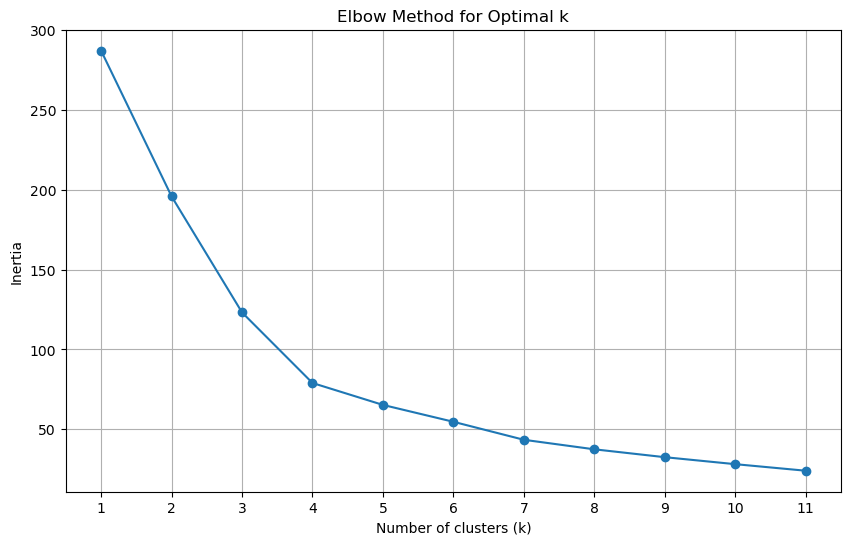

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

Inertia for k=1: 287.0
Creating KMeans model with k=2
Fitting KMeans model with k=2
Inertia for k=2: 195.82021818036043
Creating KMeans model with k=3
Fitting KMeans model with k=3
Inertia for k=3: 123.19048183836959
Creating KMeans model with k=4
Fitting KMeans model with k=4
Inertia for k=4: 79.02243535120978
Creating KMeans model with k=5
Fitting KMeans model with k=5
Inertia for k=5: 65.30237914162501
Creating KMeans model with k=6
Fitting KMeans model with k=6
Inertia for k=6: 54.7399219421002
Creating KMeans model with k=7
Fitting KMeans model with k=7
Inertia for k=7: 43.48160605008146
Creating KMeans model with k=8
Fitting KMeans model with k=8
Inertia for k=8: 37.51703249010357
Creating KMeans model with k=9
Fitting KMeans model with k=9
Inertia for k=9: 32.591890976724585
Creating KMeans model with k=10
Fitting KMeans model with k=10
Inertia for k=10: 28.222899290608932
Creating KMeans model with k=11
Fitting KMeans model with k=11
Inertia for k=11: 24.1161984214092


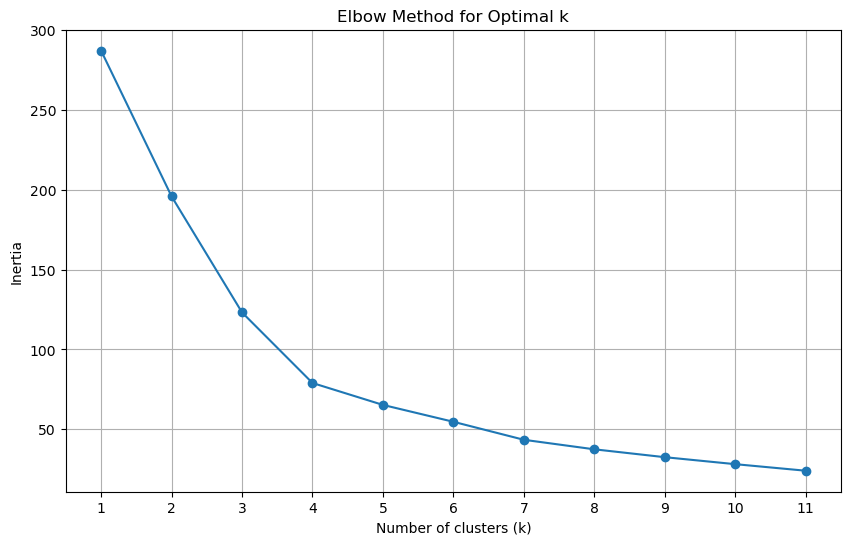

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [52]:
elbow_data = {'k': k_values, 'inertia': inertia}


In [53]:
elbow_df = pd.DataFrame(elbow_data)


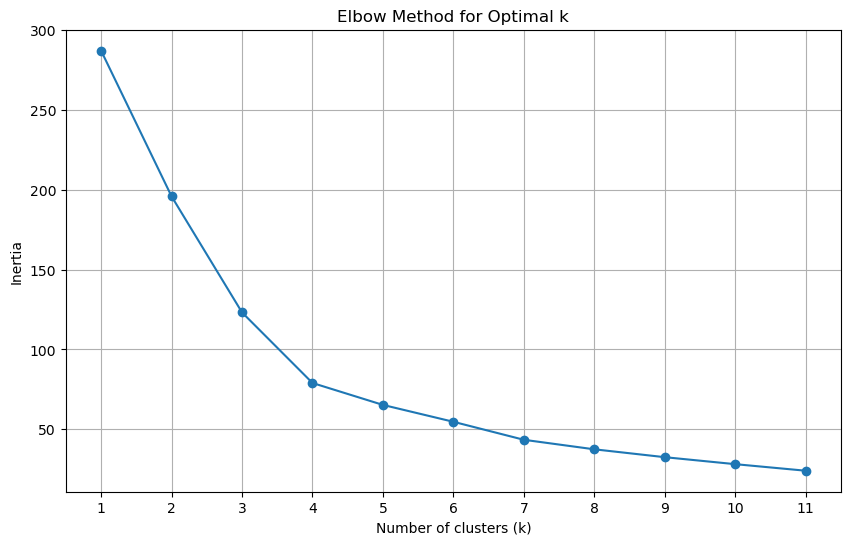

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()


In [55]:
# Create a dictionary with the data to plot the Elbow curve
# Your inertia and k_values lists
# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, 12))  # You can adjust the range as needed

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Print the inertia values
for k, inrt in zip(k_values, inertia):
    print(f"Inertia for k={k}: {inrt}")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}


# Create a DataFrame with the data to plot the Elbow curve


Inertia for k=1: 287.0
Inertia for k=2: 195.82021818036043
Inertia for k=3: 123.19048183836959
Inertia for k=4: 79.02243535120978
Inertia for k=5: 65.30237914162501
Inertia for k=6: 54.7399219421002
Inertia for k=7: 43.48160605008146
Inertia for k=8: 37.51703249010357
Inertia for k=9: 32.591890976724585
Inertia for k=10: 28.222899290608932
Inertia for k=11: 24.1161984214092


In [56]:
# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)
# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

Shape of the scaled DataFrame: (41, 7)
First few rows of the scaled DataFrame:
   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483           

In [57]:
# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")


Creating KMeans model with k=1
Fitting KMeans model with k=1
Inertia for k=1: 287.0
Creating KMeans model with k=2
Fitting KMeans model with k=2
Inertia for k=2: 195.82021818036043
Creating KMeans model with k=3
Fitting KMeans model with k=3
Inertia for k=3: 123.19048183836959
Creating KMeans model with k=4
Fitting KMeans model with k=4
Inertia for k=4: 79.02243535120978
Creating KMeans model with k=5
Fitting KMeans model with k=5
Inertia for k=5: 65.30237914162501
Creating KMeans model with k=6
Fitting KMeans model with k=6
Inertia for k=6: 54.7399219421002
Creating KMeans model with k=7
Fitting KMeans model with k=7
Inertia for k=7: 43.48160605008146
Creating KMeans model with k=8
Fitting KMeans model with k=8
Inertia for k=8: 37.51703249010357
Creating KMeans model with k=9
Fitting KMeans model with k=9
Inertia for k=9: 32.591890976724585
Creating KMeans model with k=10
Fitting KMeans model with k=10
Inertia for k=10: 28.222899290608932
Creating KMeans model with k=11
Fitting KMeans

OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

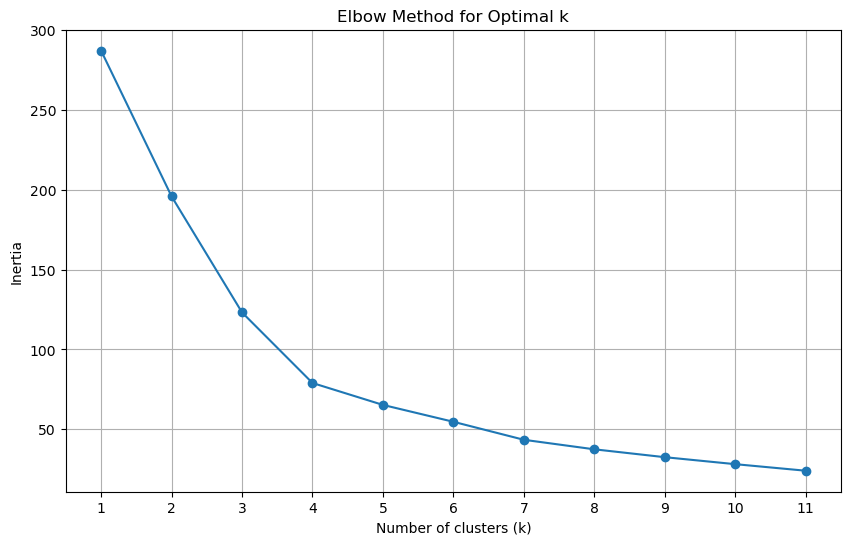

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Perform a test KMeans fitting with a known simple dataset to confirm the process works
from sklearn.datasets import make_blobs

# Generate sample data for testing
test_data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2'])

# Test KMeans on simple test data
print("Testing KMeans on simple test data...")
test_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
test_kmeans.fit(test_df)
print("Inertia on test data:", test_kmeans.inertia_)

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [59]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


scikit-learn version: 1.5.1
pandas version: 2.2.2
numpy version: 1.26.4


In [60]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


scikit-learn version: 1.5.1
pandas version: 2.2.2
numpy version: 1.26.4


In [61]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.5.1


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
Checking for missing values in the DataFrame:
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64
Shape of the scaled DataFrame: (41, 7)
Creating KMeans model with k=1
Fitting KMeans model with k=1
Inertia for k=1: 287.0
Creating KMeans model with k=2
Fitting KMeans model with k=2
Inertia for k=2: 195.82021818036043
Creating KMeans model with k=3
Fitting KMeans model with k=3
Inertia for k=3: 123.19048183836959
Creating KMeans model with k=4
Fitting KMeans model with k=4
Inertia for k=4: 79.02243535120978
Creating KMeans model with k=5
Fitting KMeans model with k=5
Inertia for k=5: 65.30237914162501
Creating KMeans model with k=6
Fitting KMeans model with k=6
Inertia for k=6: 54.7399219421002
Creating KMean

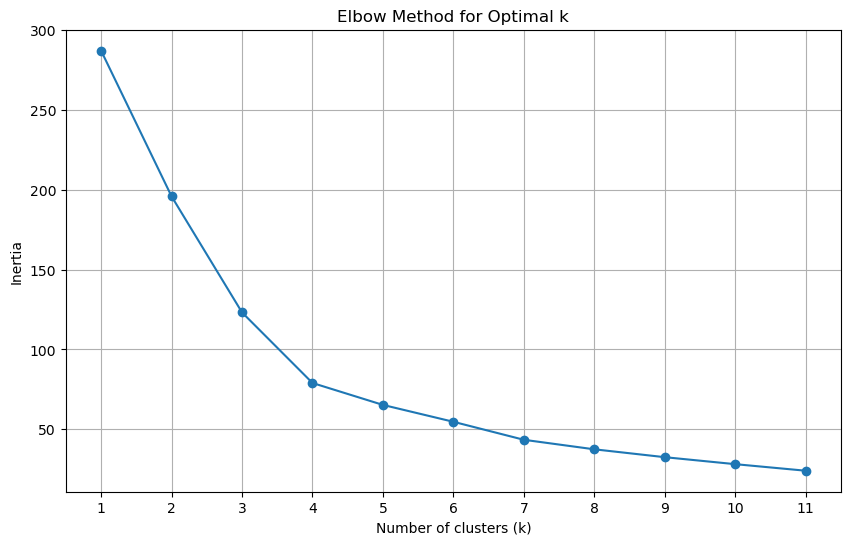

In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [63]:
# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
df.head()

First few rows of the DataFrame:


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [64]:

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
df[features].dtypes

Data types in the DataFrame:


price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [65]:
# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
scaled_df.head()

First few rows of the scaled DataFrame:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [66]:

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
df[features].describe()

Summary statistics of the DataFrame:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [67]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


scikit-learn version: 1.5.1
pandas version: 2.2.2
numpy version: 1.26.4


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

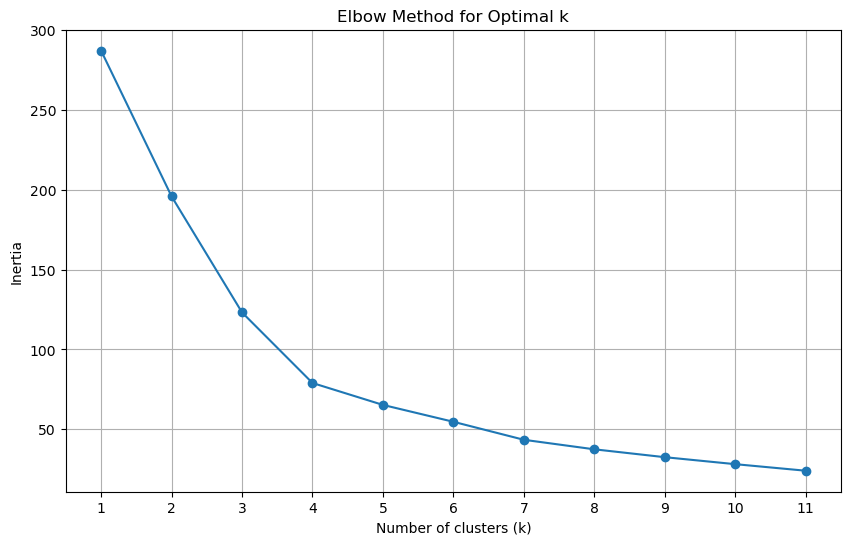

In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

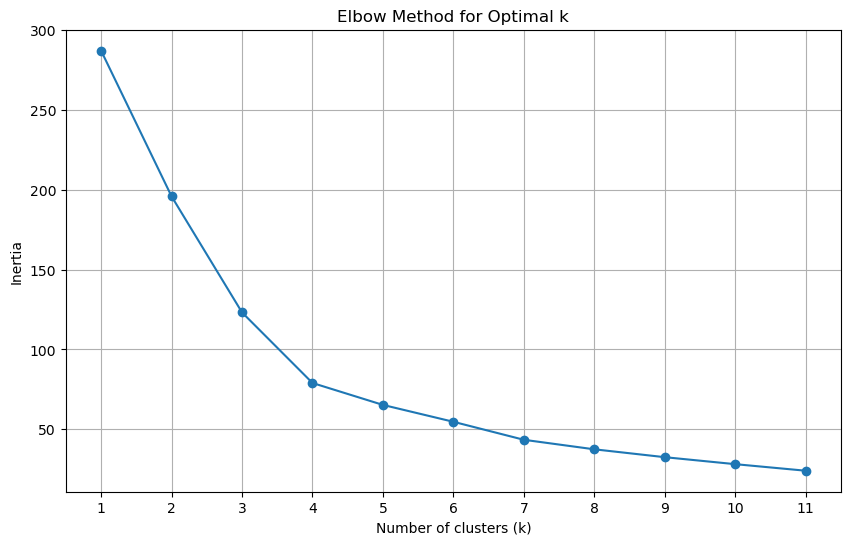

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Perform a test KMeans fitting with a known simple dataset to confirm the process works
from sklearn.datasets import make_blobs

# Generate sample data for testing
test_data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2'])

# Test KMeans on simple test data
print("Testing KMeans on simple test data...")
test_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
test_kmeans.fit(test_df)
print("Inertia on test data:", test_kmeans.inertia_)

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [70]:
# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
scaled_df.head()

First few rows of the scaled DataFrame:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


Inertia for k=1: 287.0
Inertia for k=2: 195.82021818036043
Inertia for k=3: 123.19048183836959
Inertia for k=4: 79.02243535120978
Inertia for k=5: 65.30237914162501
Inertia for k=6: 54.7399219421002
Inertia for k=7: 43.48160605008146
Inertia for k=8: 37.51703249010357
Inertia for k=9: 32.591890976724585
Inertia for k=10: 28.222899290608932
Inertia for k=11: 24.1161984214092


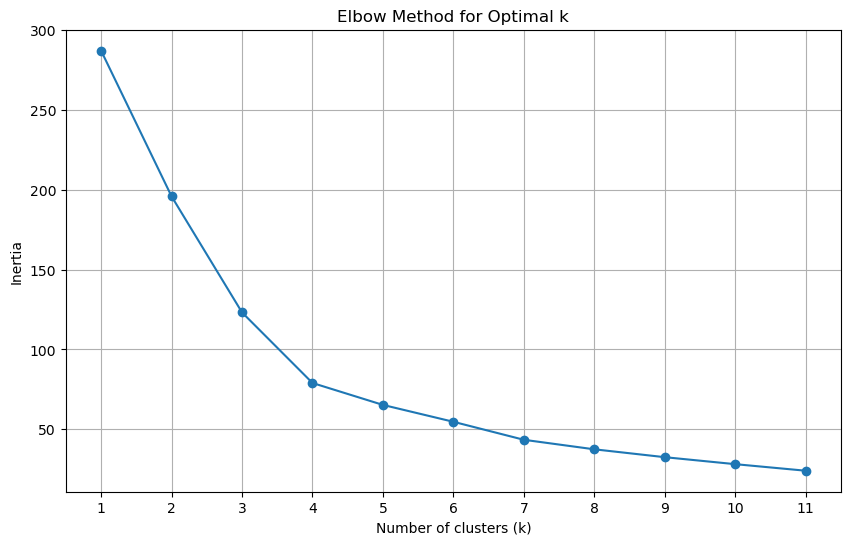

In [71]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Assuming the data is already loaded into df and scaled_df

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, 12))  # You can adjust the range as needed

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Print the inertia values
for k, inrt in zip(k_values, inertia):
    print(f"Inertia for k={k}: {inrt}")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()



In [72]:
# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

Creating KMeans model with k=1
Fitting KMeans model with k=1
Inertia for k=1: 287.0
Creating KMeans model with k=2
Fitting KMeans model with k=2
Inertia for k=2: 195.82021818036043
Creating KMeans model with k=3
Fitting KMeans model with k=3
Inertia for k=3: 123.19048183836959
Creating KMeans model with k=4
Fitting KMeans model with k=4
Inertia for k=4: 79.02243535120978
Creating KMeans model with k=5
Fitting KMeans model with k=5
Inertia for k=5: 65.30237914162501
Creating KMeans model with k=6
Fitting KMeans model with k=6
Inertia for k=6: 54.7399219421002
Creating KMeans model with k=7
Fitting KMeans model with k=7
Inertia for k=7: 43.48160605008146
Creating KMeans model with k=8
Fitting KMeans model with k=8
Inertia for k=8: 37.51703249010357
Creating KMeans model with k=9
Fitting KMeans model with k=9
Inertia for k=9: 32.591890976724585
Creating KMeans model with k=10
Fitting KMeans model with k=10
Inertia for k=10: 28.222899290608932
Creating KMeans model with k=11
Fitting KMeans

In [73]:
import threadpoolctl
# Try to set threadpool settings directly
from sklearn.utils import _openmp_helpers
print(_openmp_helpers._openmp_effective_n_threads())




1


In [74]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


scikit-learn version: 1.5.1
pandas version: 2.2.2
numpy version: 1.26.4


In [75]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")


numpy version: 1.26.4
pandas version: 2.2.2
scikit-learn version: 1.5.1


In [76]:
# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

In [77]:
import pandas as pd

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'  # Adjust the file path as necessary
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]


# Check for any missing or infinite values
print("Checking for missing or infinite values in the DataFrame:")
print(df[features].isnull().sum())
print(df[features].isin([float('inf'), float('-inf')]).sum())

# Ensure there are no missing or infinite values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Print the first few rows to ensure data is loaded correctly
print("First few rows of the DataFrame:")
df.head()

Checking for missing or infinite values in the DataFrame:
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64
First few rows of the DataFrame:


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [78]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
scaled_df.head()

Shape of the scaled DataFrame: (41, 7)
First few rows of the scaled DataFrame:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [79]:
import threadpoolctl

# Print threadpool information for debugging
print("Threadpool information:")
print(threadpoolctl.threadpool_info())


Threadpool information:
[{'user_api': 'blas', 'internal_api': 'openblas', 'num_threads': 16, 'prefix': 'libopenblas', 'filepath': '/usr/local/anaconda3/lib/python3.11/site-packages/numpy/.dylibs/libopenblas64_.0.dylib', 'version': '0.3.23.dev', 'threading_layer': 'pthreads', 'architecture': 'Nehalem'}, {'user_api': 'blas', 'internal_api': 'openblas', 'num_threads': 16, 'prefix': 'libopenblas', 'filepath': '/usr/local/anaconda3/lib/libopenblasp-r0.3.21.dylib', 'version': '0.3.21', 'threading_layer': 'pthreads', 'architecture': 'Nehalem'}, {'user_api': 'openmp', 'internal_api': 'openmp', 'num_threads': 1, 'prefix': 'libomp', 'filepath': '/usr/local/anaconda3/lib/libomp.dylib', 'version': None}]


In [80]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")



numpy version: 1.26.4
pandas version: 2.2.2
scikit-learn version: 1.5.1


Testing KMeans on simple test data...
Inertia on test data: 171.91098459057724


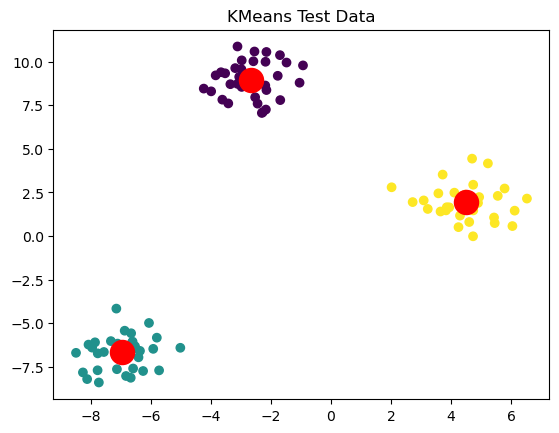

In [81]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate sample data for testing
test_data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2'])

# Test KMeans on simple test data
print("Testing KMeans on simple test data...")
try:
    test_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    test_kmeans.fit(test_df)
    print("Inertia on test data:", test_kmeans.inertia_)
    # Plot the test data and centroids
    plt.scatter(test_df['Feature1'], test_df['Feature2'], c=test_kmeans.labels_)
    plt.scatter(test_kmeans.cluster_centers_[:, 0], test_kmeans.cluster_centers_[:, 1], s=300, c='red')
    plt.title('KMeans Test Data')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

Creating KMeans model with k=1
Fitting KMeans model with k=1
Inertia for k=1: 287.0
Creating KMeans model with k=2
Fitting KMeans model with k=2
Inertia for k=2: 195.82021818036043
Creating KMeans model with k=3
Fitting KMeans model with k=3
Inertia for k=3: 123.19048183836959
Creating KMeans model with k=4
Fitting KMeans model with k=4
Inertia for k=4: 79.02243535120978
Creating KMeans model with k=5
Fitting KMeans model with k=5
Inertia for k=5: 65.30237914162501
Creating KMeans model with k=6
Fitting KMeans model with k=6
Inertia for k=6: 54.7399219421002
Creating KMeans model with k=7
Fitting KMeans model with k=7
Inertia for k=7: 43.48160605008146
Creating KMeans model with k=8
Fitting KMeans model with k=8
Inertia for k=8: 37.51703249010357
Creating KMeans model with k=9
Fitting KMeans model with k=9
Inertia for k=9: 32.591890976724585


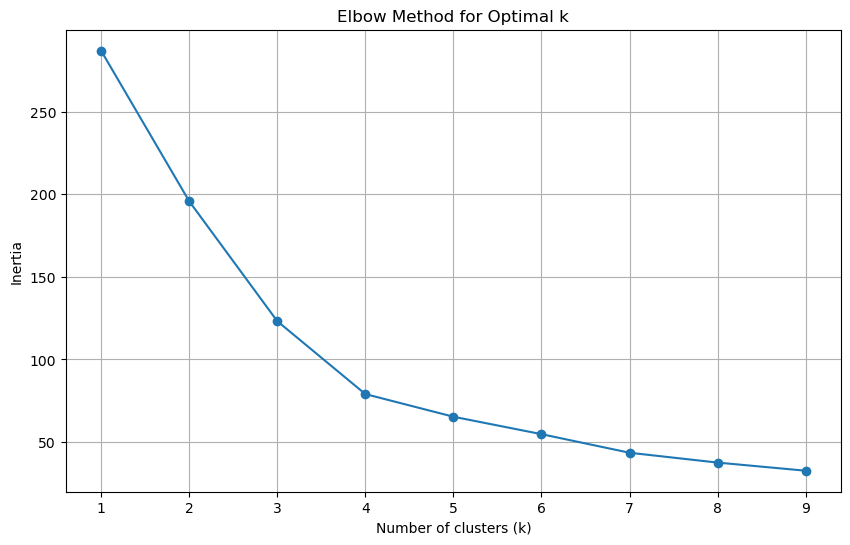

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, 10))  # Reduced range to avoid over-clustering

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [83]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")



numpy version: 1.26.4
pandas version: 2.2.2
scikit-learn version: 1.5.1


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 
In this hypothetical example, the inertia drops significantly from 
𝑘
=
1
k=1 to 
𝑘
=
3
k=3, and then the decrease slows down. Thus, 
𝑘
=
3
k=3 is likely the optimal number of clusters.


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [84]:
# Initialize the K-Means model using the best value for k
# Assuming the optimal k is identified as 3 from the Elbow plot
optimal_k = 3

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans.fit(scaled_df)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['cluster'] = labels


# Optionally, you can print the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Print the first few rows of the DataFrame with the cluster labels
df.head()


Cluster centers:
[[-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]
 [ 0.10091055  0.01701299 -0.04359225 -0.10613663 -0.12352944 -0.19951938
  -0.19069523]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]]


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


In [85]:
# Assuming the optimal k is identified as 3 from the Elbow plot
optimal_k = 3

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans.fit(scaled_df)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['cluster'] = labels

# Print the first few rows of the DataFrame with the cluster labels
df.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


In [86]:
# Assuming the optimal k is identified as 3 from the Elbow plot
optimal_k = 3

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans.fit(scaled_df)

# Predict the clusters to group the cryptocurrencies
cluster_labels = kmeans.predict(scaled_df)

# Print the resulting array of cluster values
print("Cluster Labels:")
print(cluster_labels)

# Optionally, you can add the cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Print the first few rows of the DataFrame with the cluster labels
df.head()

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


First few rows of the copied DataFrame with cluster labels:


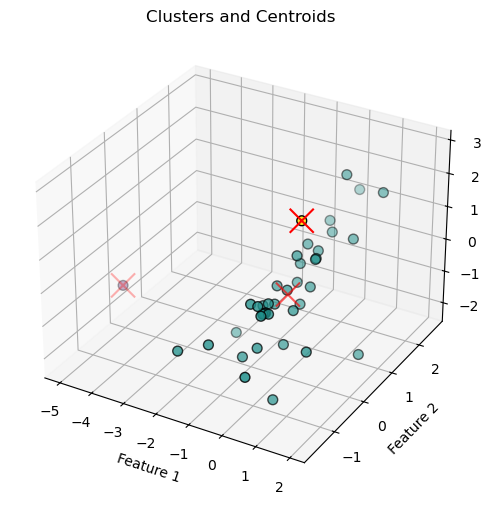

In [87]:
# Create a copy of the DataFrame
# Create a copy of the DataFrame
df_copy = df.copy()

# Assuming the optimal k is identified as 3 from the Elbow plot
optimal_k = 3

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans.fit(scaled_df)

# Predict the clusters to group the cryptocurrencies
cluster_labels = kmeans.predict(scaled_df)

# Add the cluster labels to the copied DataFrame
df_copy['cluster'] = cluster_labels

# Print the first few rows of the copied DataFrame with the cluster labels
print("First few rows of the copied DataFrame with cluster labels:")

# Optionally, visualize the clusters if you have 2 or 3 dimensions

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], scaled_df.iloc[:, 2], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='x')
ax.set_title('Clusters and Centroids')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# df_copy.head()

In [88]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data
from sklearn.cluster import KMeans

# Assuming the optimal k is identified as 3 from the Elbow plot
optimal_k = 3

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans.fit(scaled_df)

# Predict the clusters to group the cryptocurrencies
cluster_labels = kmeans.predict(scaled_df)

# Add the cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Display sample data
print("Sample data with cluster labels:")
df.head()



Sample data with cluster labels:


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


In [89]:
# Assuming the optimal k is identified as 3 from the Elbow plot
optimal_k = 3

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the scaled data
kmeans.fit(scaled_df)

# Predict the clusters to group the cryptocurrencies
cluster_labels = kmeans.predict(scaled_df)

# Add the cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Display sample data
print("Sample data with cluster labels:")
df.head()


Sample data with cluster labels:


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


In [90]:
import hvplot.pandas

# Assuming df already has the 'cluster' and 'crypto_name' columns
# Create a scatter plot using hvPlot
scatter_plot = df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    hover_cols=['crypto_name'],
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    cmap='Category10',
    size=100,
    alpha=0.6
)

# Display the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [91]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data
pca.fit(scaled_df)

# Transform the data using the PCA model
pca_data = pca.transform(scaled_df)

# Create a DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Print the first few rows of the PCA DataFrame
print("First few rows of the PCA DataFrame:")
pca_df.head()


First few rows of the PCA DataFrame:


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [92]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit and transform the data using the PCA model
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the PCA DataFrame
print("First five rows of the PCA DataFrame:")
pca_df.head()


First five rows of the PCA DataFrame:


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [93]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit and transform the data using the PCA model
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

# View the first five rows of the PCA DataFrame
print("\nFirst five rows of the PCA DataFrame:")
pca_df.head()


Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760

First five rows of the PCA DataFrame:


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [94]:

from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit and transform the data using the PCA model
pca_data = pca.fit_transform(scaled_df)

# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the explained variance for each principal component
print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

# Display the total explained variance
print(f"\nTotal Explained Variance: {total_explained_variance:.4f}")

# View the first five rows of the PCA DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
print("\nFirst five rows of the PCA DataFrame:")
pca_df.head()

Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760

Total Explained Variance: 0.8950

First five rows of the PCA DataFrame:


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is the sum of the explained variance ratios for PC1, PC2, and PC3. The total explained Variance is 0.8950

In [95]:
df.columns

Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'cluster'],
      dtype='object')

In [96]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit and transform the data using the PCA model
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = df['coin_id'].values

# Assuming 'coinid' is the column name for the coin IDs in the original DataFrame
pca_df['coin_id'] = df['coin_id'].values

# Set the 'coinid' column as the index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print("Sample data with PCA components and crypto names:")
pca_df.head()


Sample data with PCA components and crypto names:


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [97]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print("List of k-values from 1 to 11:")
print(k_values)


List of k-values from 1 to 11:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [98]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
from sklearn.cluster import KMeans

# Assuming df_market_data_pca is your DataFrame with PCA-transformed data

# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # 2. Fit the model to the data using df_market_data_pca
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Display the list of inertia values
print("List of inertia values for k from 1 to 11:")
print(inertia)


List of inertia values for k from 1 to 11:
[256.87408556789217, 165.90199402035984, 93.7746256805729, 49.66549665179732, 37.8394659868124, 30.77774614144115, 21.134056037473595, 17.09163664386474, 13.681139692992744, 10.63064757387096, 8.128620320213486]


In [99]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


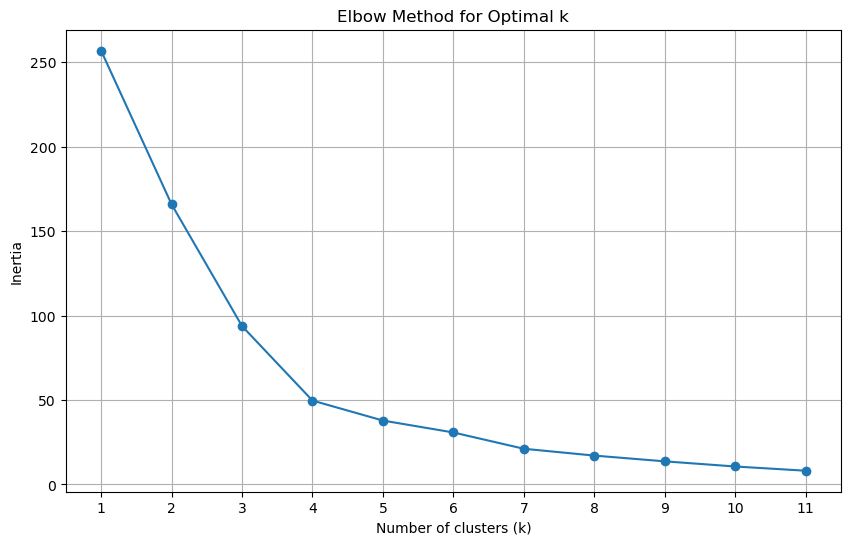

In [100]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Assuming you have already computed the inertia values and stored them in the 'inertia' list
# and that 'k_values' is a list of k values from 1 to 11.

# Plot the inertia values for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [101]:

# Import KneeLocator from kneed
from kneed import KneeLocator

# Assuming you have already computed the inertia values and stored them in the 'inertia' list
# and that 'k_values' is a list of k values from 1 to 11.

# Use KneeLocator to find the elbow point
kneedle = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f"The optimal number of clusters is: {optimal_k}")


The optimal number of clusters is: 4


In [102]:
# Fit the K-Means model using the PCA data
from sklearn.cluster import KMeans

# Assuming the optimal k is determined as 3
optimal_k = 3

# Create a K-Means model instance with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the PCA-transformed data
kmeans.fit(pca_df)

# Predict the clusters for the PCA-transformed data
cluster_labels = kmeans.predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['cluster'] = cluster_labels

# Display the first few rows of the PCA DataFrame with cluster labels
print("First few rows of the PCA DataFrame with cluster labels:")
pca_df.head()


First few rows of the PCA DataFrame with cluster labels:


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [103]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.
from sklearn.cluster import KMeans

# Assuming the optimal k is determined as 3
optimal_k = 3

# Create a K-Means model instance with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model to the PCA-transformed data
kmeans.fit(pca_df)

# Predict the clusters for the PCA-transformed data
cluster_labels = kmeans.predict(pca_df)

# Print the resulting array of cluster values
print("Array of cluster values:")
print(cluster_labels)


Array of cluster values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [104]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
# Assuming 'pca_df' is your DataFrame with the PCA-transformed data
# and 'cluster_labels' contains the predicted clusters

# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = cluster_labels

# Display sample data
print("Sample data with PCA components and predicted clusters:")
pca_df_copy.head()


Sample data with PCA components and predicted clusters:


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [105]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

# Assuming 'pca_df_copy' is your DataFrame with PCA data and cluster labels
# and 'crypto_name' is the column name for the cryptocurrency names

# Create the scatter plot using hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    hover_cols=['crypto_name'],
    title='Cryptocurrency Clusters',
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2,cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

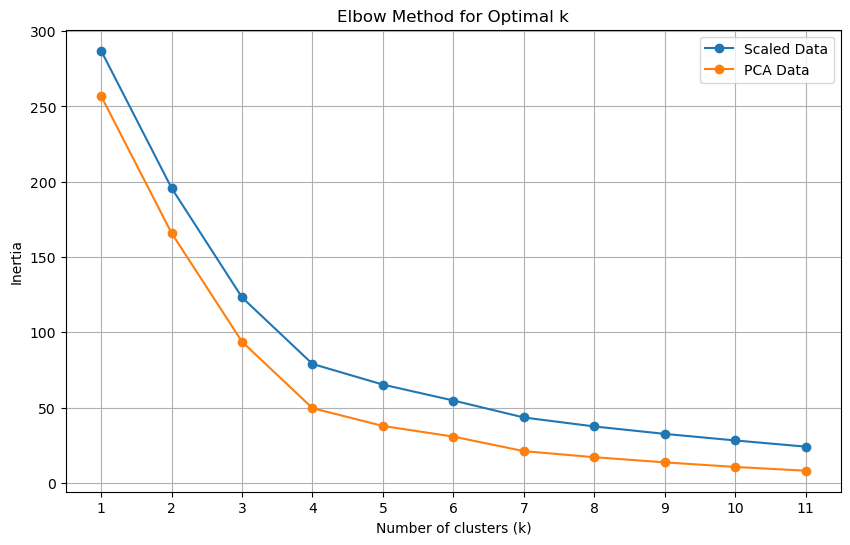

In [106]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data into a DataFrame
file_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Crypto-Clustering Analysis/Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Apply PCA to the scaled data
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Create lists to store inertia values for two methods
inertia1 = []
inertia2 = []

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Method 1: Compute inertia for the original scaled data
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia1.append(kmeans.inertia_)

# Method 2: Compute inertia for the PCA-transformed data
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df)
    inertia2.append(kmeans.inertia_)

# Plot the inertia values for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia1, marker='o', label='Scaled Data')
plt.plot(k_values, inertia2, marker='o', label='PCA Data')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


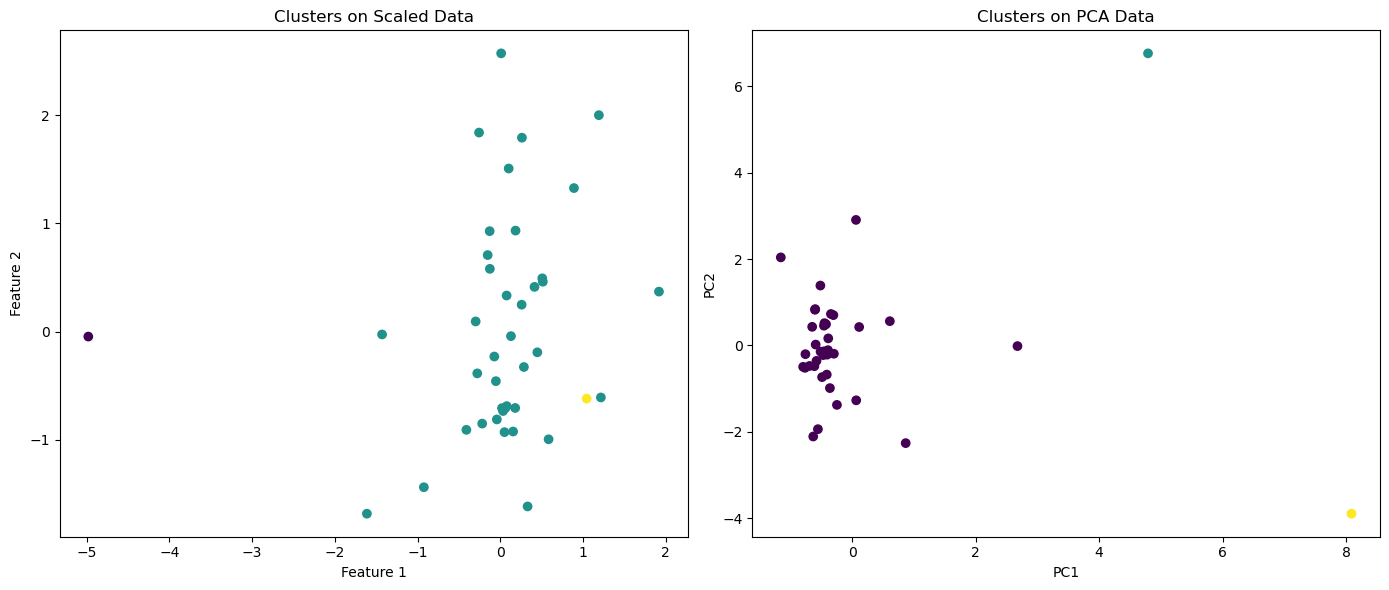

In [107]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

# Assuming the optimal k is determined as 3 for both datasets
optimal_k = 3

# Fit the KMeans model to the original scaled data
kmeans_scaled = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_scaled.fit(scaled_df)
clusters_scaled = kmeans_scaled.predict(scaled_df)

# Fit the KMeans model to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pca.fit(pca_df)
clusters_pca = kmeans_pca.predict(pca_df)

# Add the cluster labels to the dataframes
scaled_df['cluster'] = clusters_scaled
pca_df['cluster'] = clusters_pca

# Create a composite plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters for the original scaled data
axes[0].scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=scaled_df['cluster'], cmap='viridis', marker='o')
axes[0].set_title('Clusters on Scaled Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot clusters for the PCA-transformed data
axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', marker='o')
axes[1].set_title('Clusters on PCA Data')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

plt.tight_layout()
plt.show()


In [108]:
print(df.columns)


Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


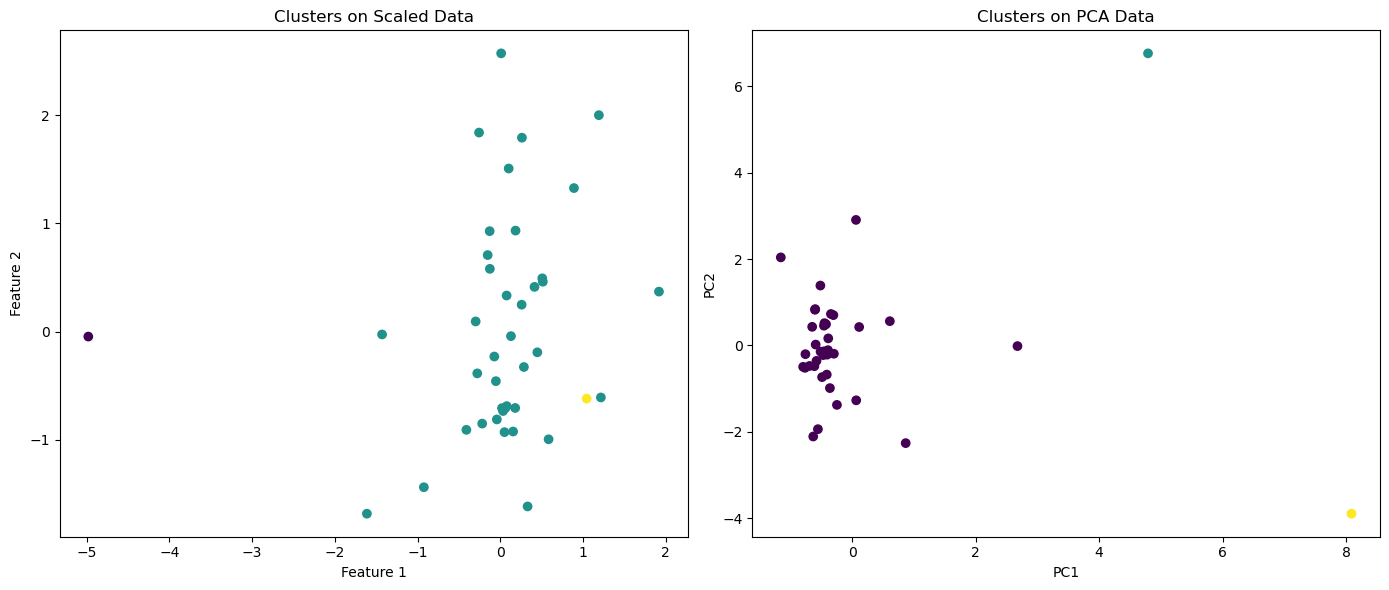

In [109]:
# Create the scatter plot for the scaled data
scatter_plot_scaled = scaled_df.hvplot.scatter(
    x=scaled_df.columns[0],
    y=scaled_df.columns[1],
    c='cluster',
    hover_cols=['crypto_id'],
    title='Clusters on Scaled Data',
    width=700,
    height=500
)

# Create the scatter plot for the PCA data
scatter_plot_pca = pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    hover_cols=['crypto_id'],
    title='Clusters on PCA Data',
    width=700,
    height=500
)

# Add the cluster labels to the dataframes
scaled_df['cluster'] = clusters_scaled
pca_df['cluster'] = clusters_pca

# Create a composite plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters for the original scaled data
axes[0].scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=scaled_df['cluster'], cmap='viridis', marker='o')
axes[0].set_title('Clusters on Scaled Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot clusters for the PCA-transformed data
axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', marker='o')
axes[1].set_title('Clusters on PCA Data')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

plt.tight_layout()
plt.show()



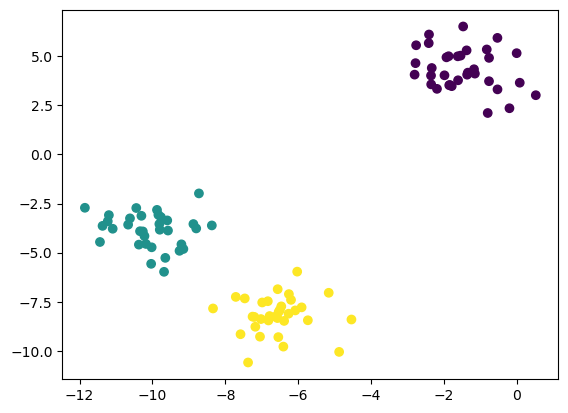

In [110]:
# Generate three synthetic clusters
X, y = make_blobs(
    centers=3, 
    random_state=1
)

# Visualizing all three classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [111]:
print(df.columns)
print(df.head())

Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3            

#### Answer the following question: 

  * **Question:** 
  After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  Using fewer features to cluster the data using K-Means, as seen with the PCA-transformed data, can simplify the clustering process by reducing the dimensionality and focusing on the most significant components. This can lead to clearer and more interpretable clusters. However, this reduction might also result in the loss of some information that could be relevant for distinguishing between clusters.